# Binary classification

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
word_index = imdb.get_word_index()

Reverse the word index to obtain a dict mapping indices to words

In [7]:
word_index = dict([(value, key) for (key, value) in word_index.items()])
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
for _ in train_data[0]:
    print(word_index.get(_ - 3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [9]:
## Text vectorization
def vectorization(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [10]:
x_train = vectorization(train_data)
x_test = vectorization(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Training the model

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))  # Layer with 16 neurons
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer of 1 neuron

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
## Setting the metrics with which it will be evaluated
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

In [15]:
## Creating validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
## Training the model
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5494 - accuracy: 0.7705 - val_loss: 0.4331 - val_accuracy: 0.8565
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3351 - accuracy: 0.8984 - val_loss: 0.3334 - val_accuracy: 0.8764
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2411 - accuracy: 0.9225 - val_loss: 0.2886 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1859 - accuracy: 0.9405 - val_loss: 0.2870 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1505 - accuracy: 0.9518 - val_loss: 0.2957 - val_accuracy: 0.8820
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1246 - accuracy: 0.9608 - val_loss: 0.2895 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1019 - accuracy: 0.9701 - val_loss: 0.3145 - val_accuracy: 0.8825
Epoch 8/20
30

you can also create the validation set in a faster way

```python
history = model.fit(partial_x_train, partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_split=0.3)
```

## Visualizing the performance

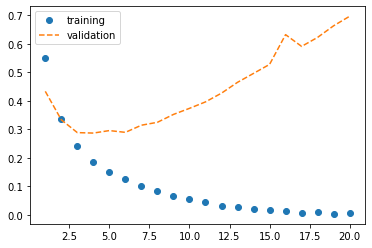

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label='training')
plt.plot(epoch, val_loss_values, '--', label='validation')
plt.legend()
plt.show()

We can see that for the validation set, it did not generalize as well or as quickly as it did with the training set. This means that there was overfitting.

In [18]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7523 - accuracy: 0.8523


[0.752268373966217, 0.8522800207138062]

## Using a less complex model to reduce overfitting

We will be using layers with 4 neurons

In [19]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))  # Layer with 4 neurons
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))  # Output layer of 1 neuron

In [20]:
## Setting the metrics with which it will be evaluated
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

In [30]:
## Training the model
history2 = model2.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5798 - accuracy: 0.7687 - val_loss: 0.4932 - val_accuracy: 0.8495
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4250 - accuracy: 0.8781 - val_loss: 0.4011 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3392 - accuracy: 0.9024 - val_loss: 0.3470 - val_accuracy: 0.8798
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2816 - accuracy: 0.9183 - val_loss: 0.3157 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2407 - accuracy: 0.9280 - val_loss: 0.2941 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2096 - accuracy: 0.9360 - val_loss: 0.2854 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1850 - accuracy: 0.9449 - val_loss: 0.2805 - val_accuracy: 0.8886
Epoch 8/20
30

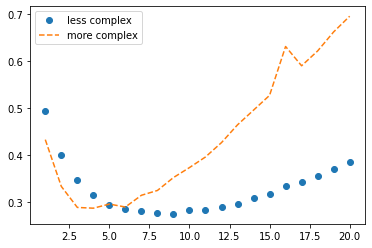

In [31]:
val_loss_values_2 = history2.history['val_loss']

plt.plot(epoch, val_loss_values_2, 'o', label='less complex')
plt.plot(epoch, val_loss_values, '--', label='more complex')
plt.legend()
plt.show()

## Regularization

Now, we will be using the original neural network but implemeting L1 regularization

In [25]:
from keras import regularizers

In [32]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),
                        kernel_regularizer=regularizers.l2(0.001)))  # Layer with 16 neurons
model3.add(layers.Dense(16, activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))  # Output layer of 1 neuron

## Setting the metrics with which it will be evaluated
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

## Training the model
history3 = model3.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5568 - accuracy: 0.7849 - val_loss: 0.4314 - val_accuracy: 0.8728
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3605 - accuracy: 0.8983 - val_loss: 0.3613 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2914 - accuracy: 0.9205 - val_loss: 0.3455 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2572 - accuracy: 0.9331 - val_loss: 0.3283 - val_accuracy: 0.8901
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2317 - accuracy: 0.9413 - val_loss: 0.3293 - val_accuracy: 0.8871
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2170 - accuracy: 0.9469 - val_loss: 0.3346 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2031 - accuracy: 0.9527 - val_loss: 0.3429 - val_accuracy: 0.8831
Epoch 8/20
30

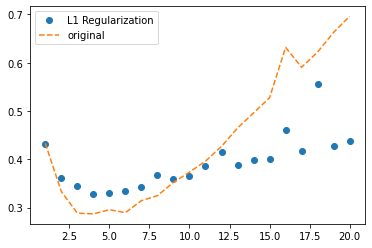

In [33]:
val_loss_values_3 = history3.history['val_loss']

plt.plot(epoch, val_loss_values_3, 'o', label='L1 Regularization')
plt.plot(epoch, val_loss_values, '--', label='original')
plt.legend()
plt.show()

## Dropout

In [34]:
model4 = models.Sequential()
model4.add(layers.Dense(4, activation='relu', input_shape=(10000,)))  # Layer with 4 neurons
model4.add(layers.Dropout(0.5))  # 50% of the neurons will de deactivated
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))  # Output layer of 1 neuron

## Setting the metrics with which it will be evaluated
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

## Training the model
history4 = model4.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.6828 - accuracy: 0.5426 - val_loss: 0.6635 - val_accuracy: 0.7490
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6541 - accuracy: 0.5953 - val_loss: 0.6337 - val_accuracy: 0.8452
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6258 - accuracy: 0.6279 - val_loss: 0.6003 - val_accuracy: 0.8619
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6032 - accuracy: 0.6429 - val_loss: 0.5706 - val_accuracy: 0.8718
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5830 - accuracy: 0.6529 - val_loss: 0.5480 - val_accuracy: 0.8695
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5672 - accuracy: 0.6641 - val_loss: 0.5179 - val_accuracy: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5567 - accuracy: 0.6702 - val_loss: 0.4968 - val_accuracy: 0.8847
Epoch 8/20
30

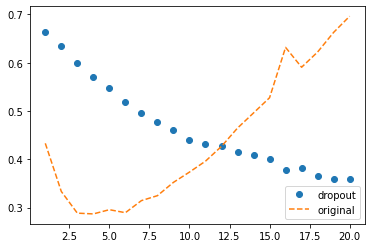

In [35]:
val_loss_values_4 = history4.history['val_loss']

plt.plot(epoch, val_loss_values_4, 'o', label='dropout')
plt.plot(epoch, val_loss_values, '--', label='original')
plt.legend()
plt.show()